In [30]:
#https://www.analyticsvidhya.com/blog/2018/06/unsupervised-deep-learning-computer-vision/
%pylab inline
import os
import keras
import numpy as np
import pandas as pd
import keras.backend as K
from keras import regularizers


from time import time
from sklearn.cluster import KMeans
from keras import callbacks
from keras.models import Model
from keras.optimizers import SGD
from keras.layers import Dense, Input
from keras.initializers import VarianceScaling
from keras.engine.topology import Layer, InputSpec



Populating the interactive namespace from numpy and matplotlib


c:\python36\lib\site-packages\IPython\core\magics\pylab.py:160: UserWarning: pylab import has clobbered these variables: ['time']
`%matplotlib` prevents importing * from pylab and numpy
  "\n`%matplotlib` prevents importing * from pylab and numpy"


In [36]:
fashion_mnist = keras.datasets.fashion_mnist

(train_x, train_y), (val_x, val_y) = fashion_mnist.load_data()

In [9]:
class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat', 
               'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']

In [10]:
print(class_names)

['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat', 'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']


In [38]:
train_x = train_x/255.
val_x = val_x/255.

train_x = train_x.reshape(-1, 784)
val_x = val_x.reshape(-1, 784)

In [13]:

input_img = Input(shape=(784,))

# суть в том, что пытаемся заюзать меньше битов 
encoded = Dense(2000, activation='relu')(input_img)
encoded = Dense(500, activation='relu',
                activity_regularizer=keras.regularizers.l1(10e-10))(encoded)
encoded = Dense(500, activation='relu',
                activity_regularizer=keras.regularizers.l1(10e-10))(encoded)
# слой с выходом равным количеству классов
encoded = Dense(10, activation='sigmoid',
                activity_regularizer=keras.regularizers.l1(10e-10))(encoded)

# восстановление с потерями входного сигнала 
decoded = Dense(500, activation='relu')(encoded)
decoded = Dense(500, activation='relu')(decoded)
decoded = Dense(2000, activation='relu')(decoded)
decoded = Dense(784)(decoded)

# this model maps an input to its reconstruction
autoencoder = Model(input_img, decoded)

In [14]:
autoencoder.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_3 (InputLayer)         (None, 784)               0         
_________________________________________________________________
dense_3 (Dense)              (None, 2000)              1570000   
_________________________________________________________________
dense_4 (Dense)              (None, 500)               1000500   
_________________________________________________________________
dense_5 (Dense)              (None, 500)               250500    
_________________________________________________________________
dense_6 (Dense)              (None, 10)                5010      
_________________________________________________________________
dense_7 (Dense)              (None, 500)               5500      
_________________________________________________________________
dense_8 (Dense)              (None, 500)               250500    
__________

In [15]:
#  this model maps an input to its encoded representation
encoder = Model(input_img, encoded)

In [16]:
autoencoder.compile(optimizer='adam', loss='mse')

In [17]:
estop = keras.callbacks.EarlyStopping(monitor='val_loss', min_delta=0, patience=10, verbose=1, mode='auto')

In [18]:
train_history = autoencoder.fit(train_x, train_x, epochs=5, batch_size=2048, validation_data=(val_x, val_x), callbacks=[estop])

Train on 60000 samples, validate on 10000 samples
Epoch 1/5
60000/60000 [==============================] - 45s 745us/step - loss: 0.0912 - val_loss: 0.0670
Epoch 2/5
60000/60000 [==============================] - 46s 768us/step - loss: 0.0583 - val_loss: 0.0482
Epoch 3/5
60000/60000 [==============================] - 44s 733us/step - loss: 0.0423 - val_loss: 0.0390
Epoch 4/5
60000/60000 [==============================] - 44s 730us/step - loss: 0.0373 - val_loss: 0.0357
Epoch 5/5
60000/60000 [==============================] - 45s 755us/step - loss: 0.0342 - val_loss: 0.0315


In [19]:
pred = autoencoder.predict(val_x)
print(val_x.shape)

(10000, 784)


Копия:

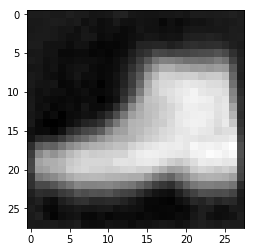

In [31]:
plt.imshow(pred[0].reshape(28, 28), cmap='gray')

Неповторимый оригинал

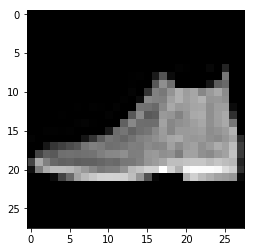

In [32]:
plt.imshow(val_x[0].reshape(28, 28), cmap='gray')

In [41]:
# Оценим модель по тестовому набору 
#train_y = train_y/255.
#val_y = val_y/255.
#print(train_y.shape)
#print(val_y.shape)
#train_y = train_y.reshape(-1, 784)
#val_y = val_y.reshape(-1, 784)
score = autoencoder.evaluate(train_x.reshape(-1, 10000), val_x.reshape(-1, 10000), verbose=0)
print('\n', 'Test accuracy:', score[1])

ValueError: Error when checking input: expected input_3 to have shape (784,) but got array with shape (10000,)